<a href="https://colab.research.google.com/github/wendywtchang/NLP-projects/blob/master/topic_modeling/Top2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top2Vec Usage
- [Top2Vec](https://github.com/ddangelov/Top2Vec)
- [Paper](https://arxiv.org/abs/2008.09470)
- Algorithm:
  1. Create jointly embedded document and word vectors using Doc2Vec or Universal Sentence Encoder or BERT Sentence Transformer.
  2. Create lower dimensional embedding of document vectors using UMAP.
  3. Find dense areas of documents using HDBSCAN.
  4. For each dense area calculate the centroid of document vectors in original dimension, this is the topic vector.
  5. Find n-closest word vectors to the resulting topic vector.

In [1]:
!pip install top2vec

     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 5.2 MB 30.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 48.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330750 sha256=1b6f95db0d767087e4d7a437a717153e3d73e78ff0ca40d73f459372ab9f7e2c
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=dac089ad50713920cf9aa8afecc68164b5cf93e5149db67cda2d49dbfee39144
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=e8a14da70e7888bc1ceb99c8538d5fc6467df6cc49e9d684de352d3a87a4ec51
  St

## 1. Load Dataset & Create Model

In [4]:
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

model = Top2Vec(documents=newsgroups.data, speed="learn", workers=8)

2022-02-17 14:44:29,321 - top2vec - INFO - Pre-processing documents for training
2022-02-17 14:44:37,994 - top2vec - INFO - Creating joint document/word embedding
2022-02-17 14:56:18,595 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-02-17 14:56:57,629 - top2vec - INFO - Finding dense areas of documents
2022-02-17 14:57:00,081 - top2vec - INFO - Finding topics


In [5]:
type(documents)

list

## Model's Results

In [16]:
# Get Number of Topics
topic_n = model.get_num_topics()
# Get Topic Sizes
topic_sizes, topic_nums = model.get_topic_sizes()
# Get Topics
topic_words, word_scores, topic_nums = model.get_topics(77)


In [7]:
# Search Topics
# example, search 'medicine' topics
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)

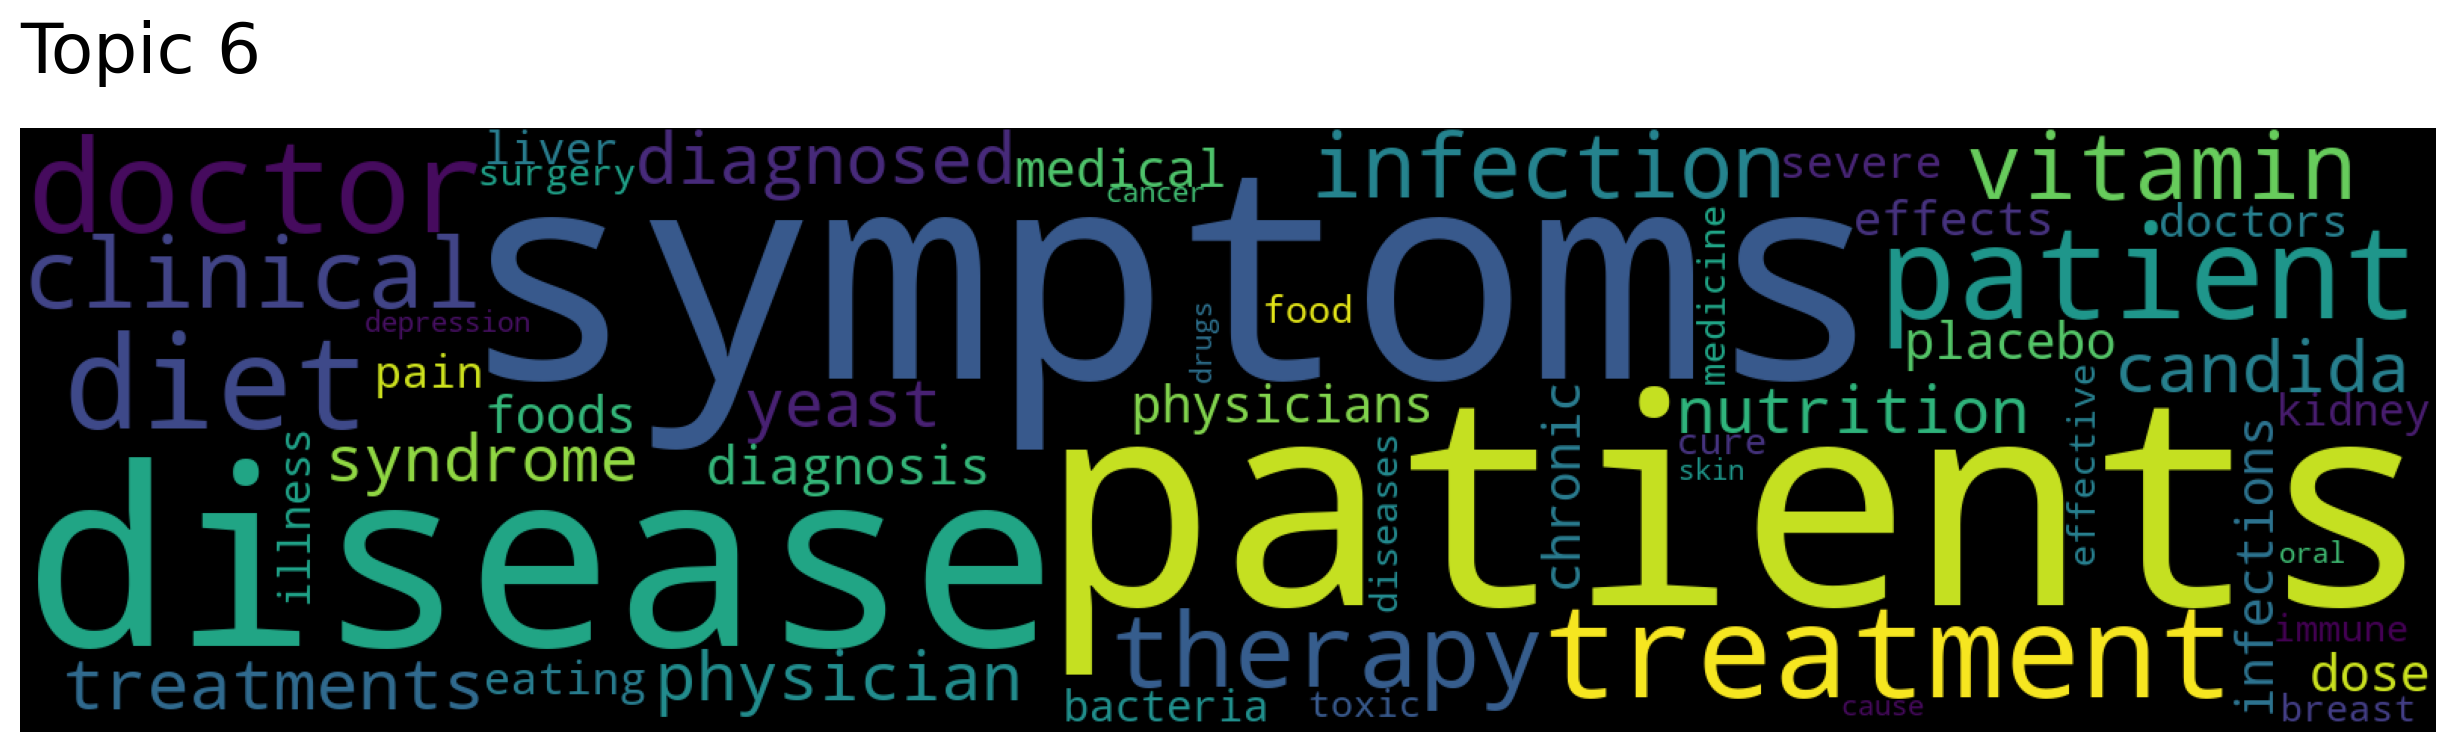

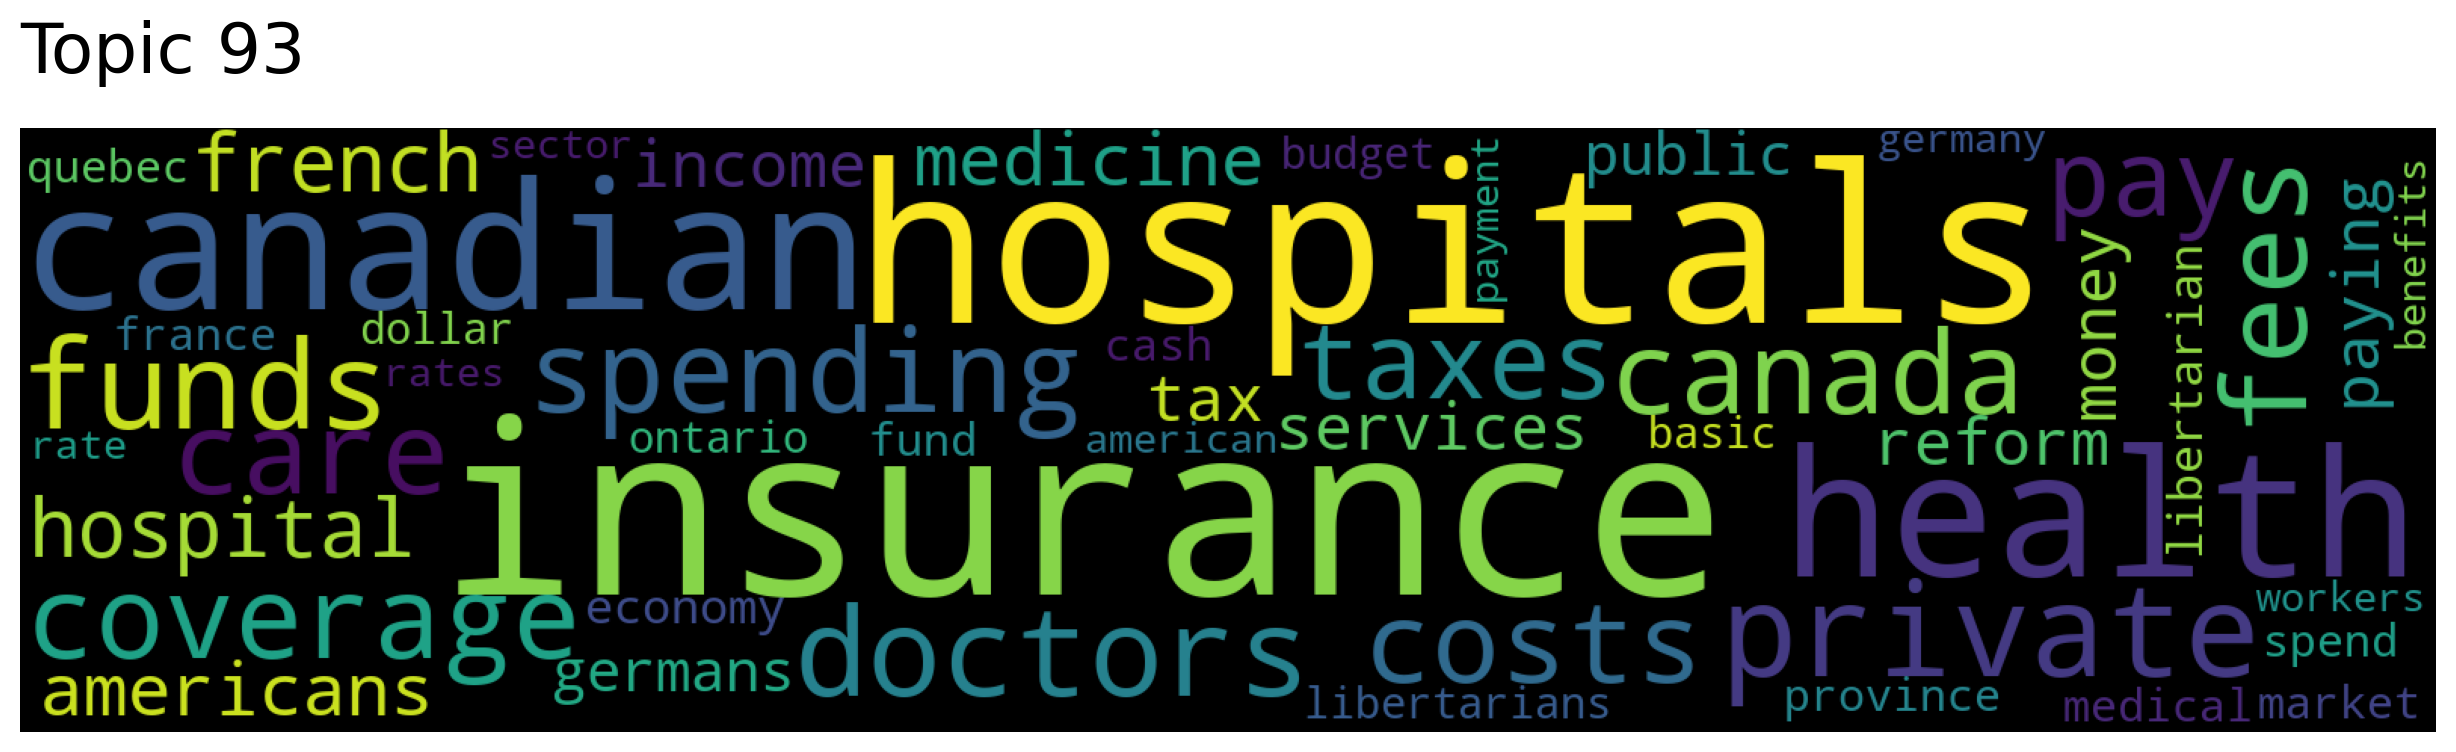

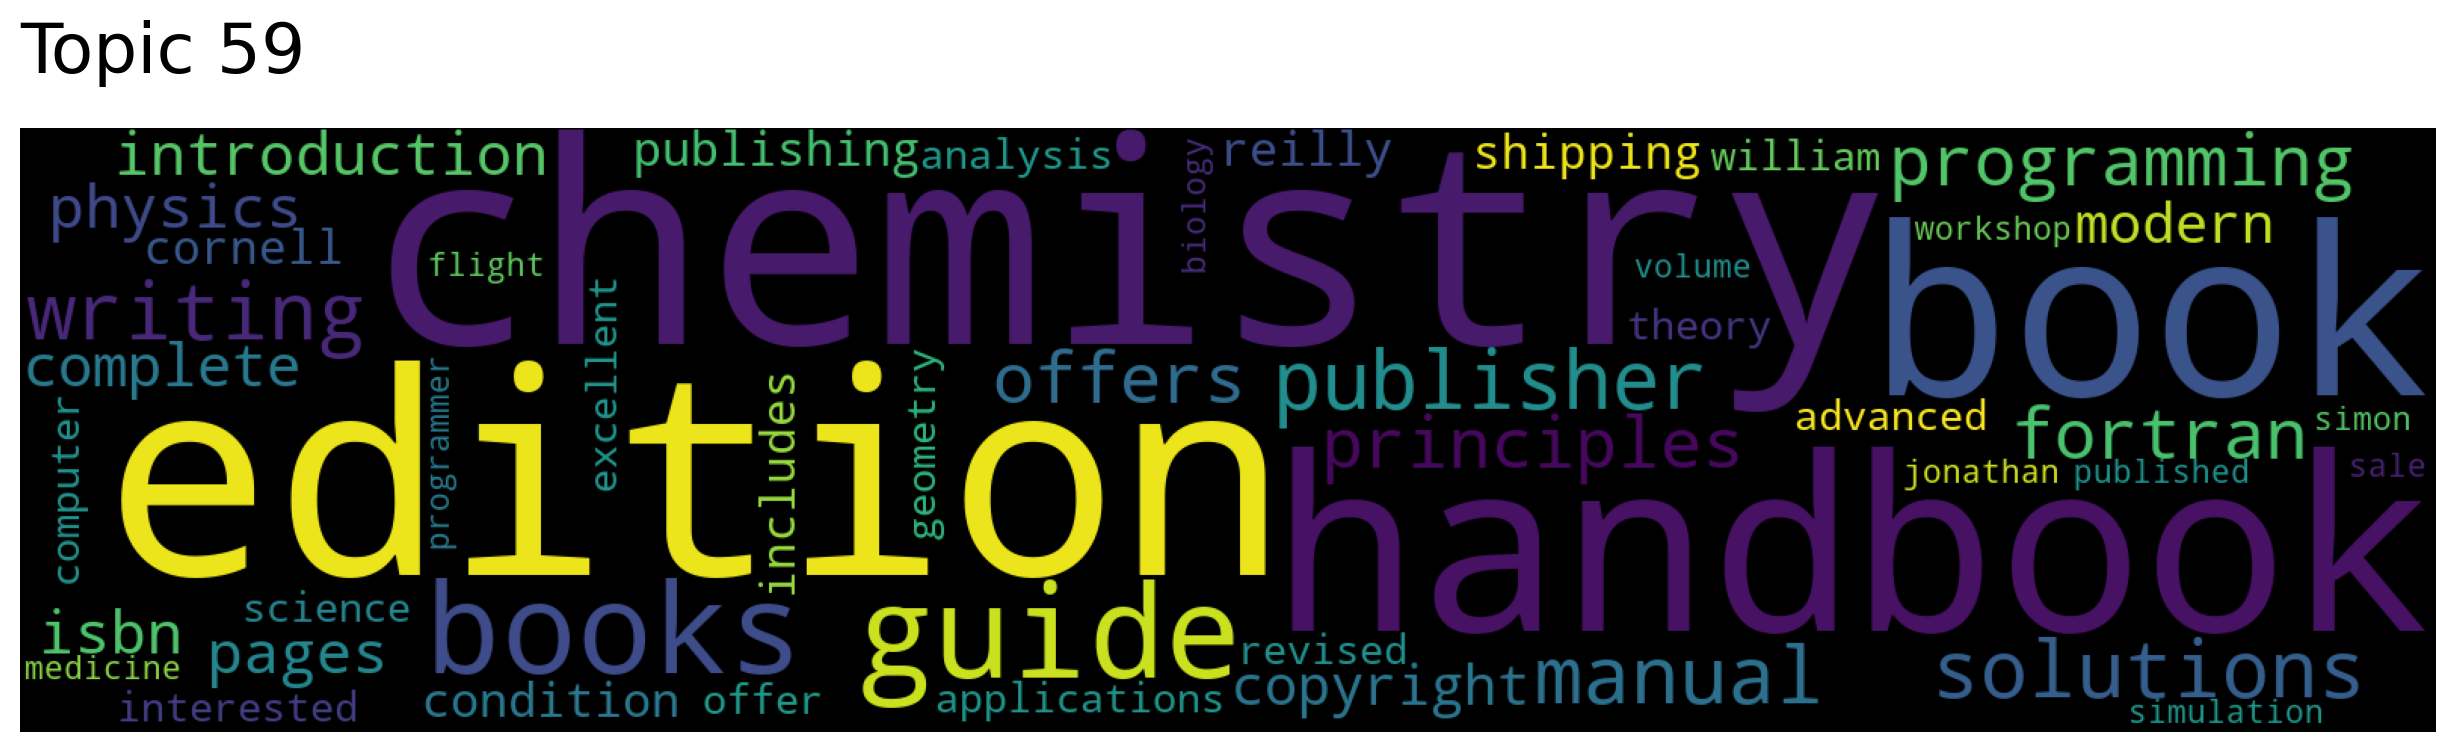

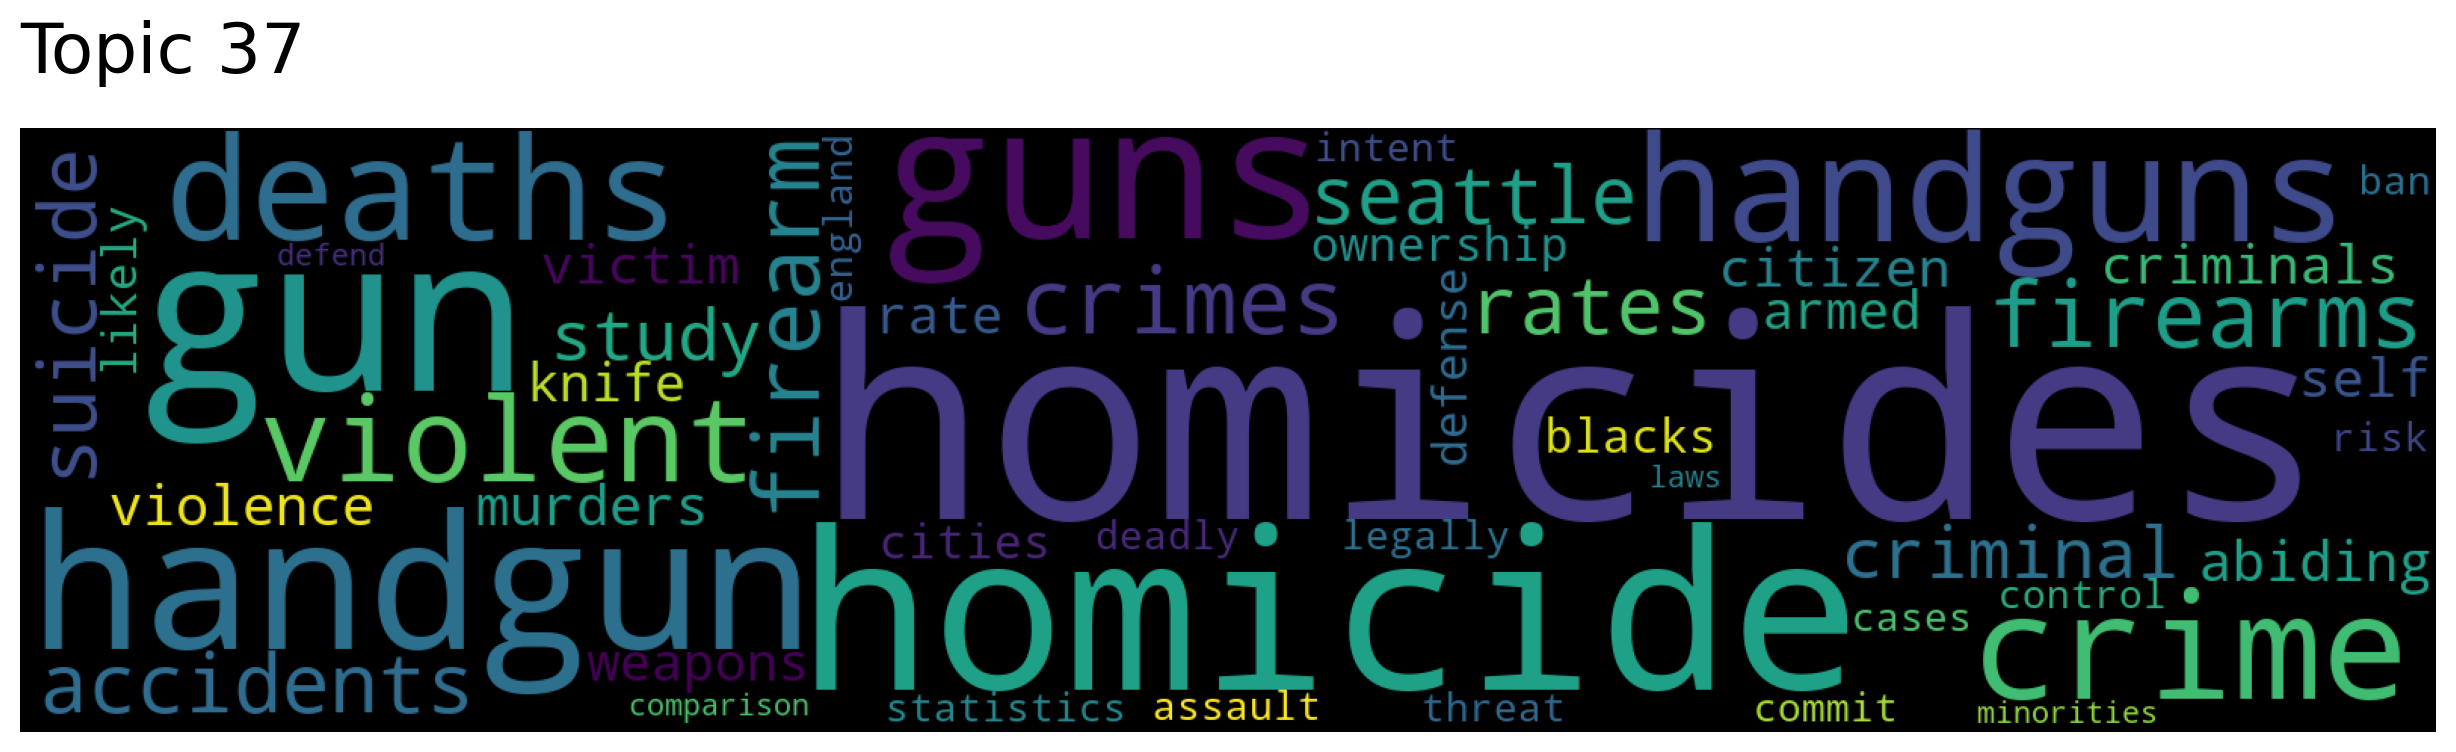

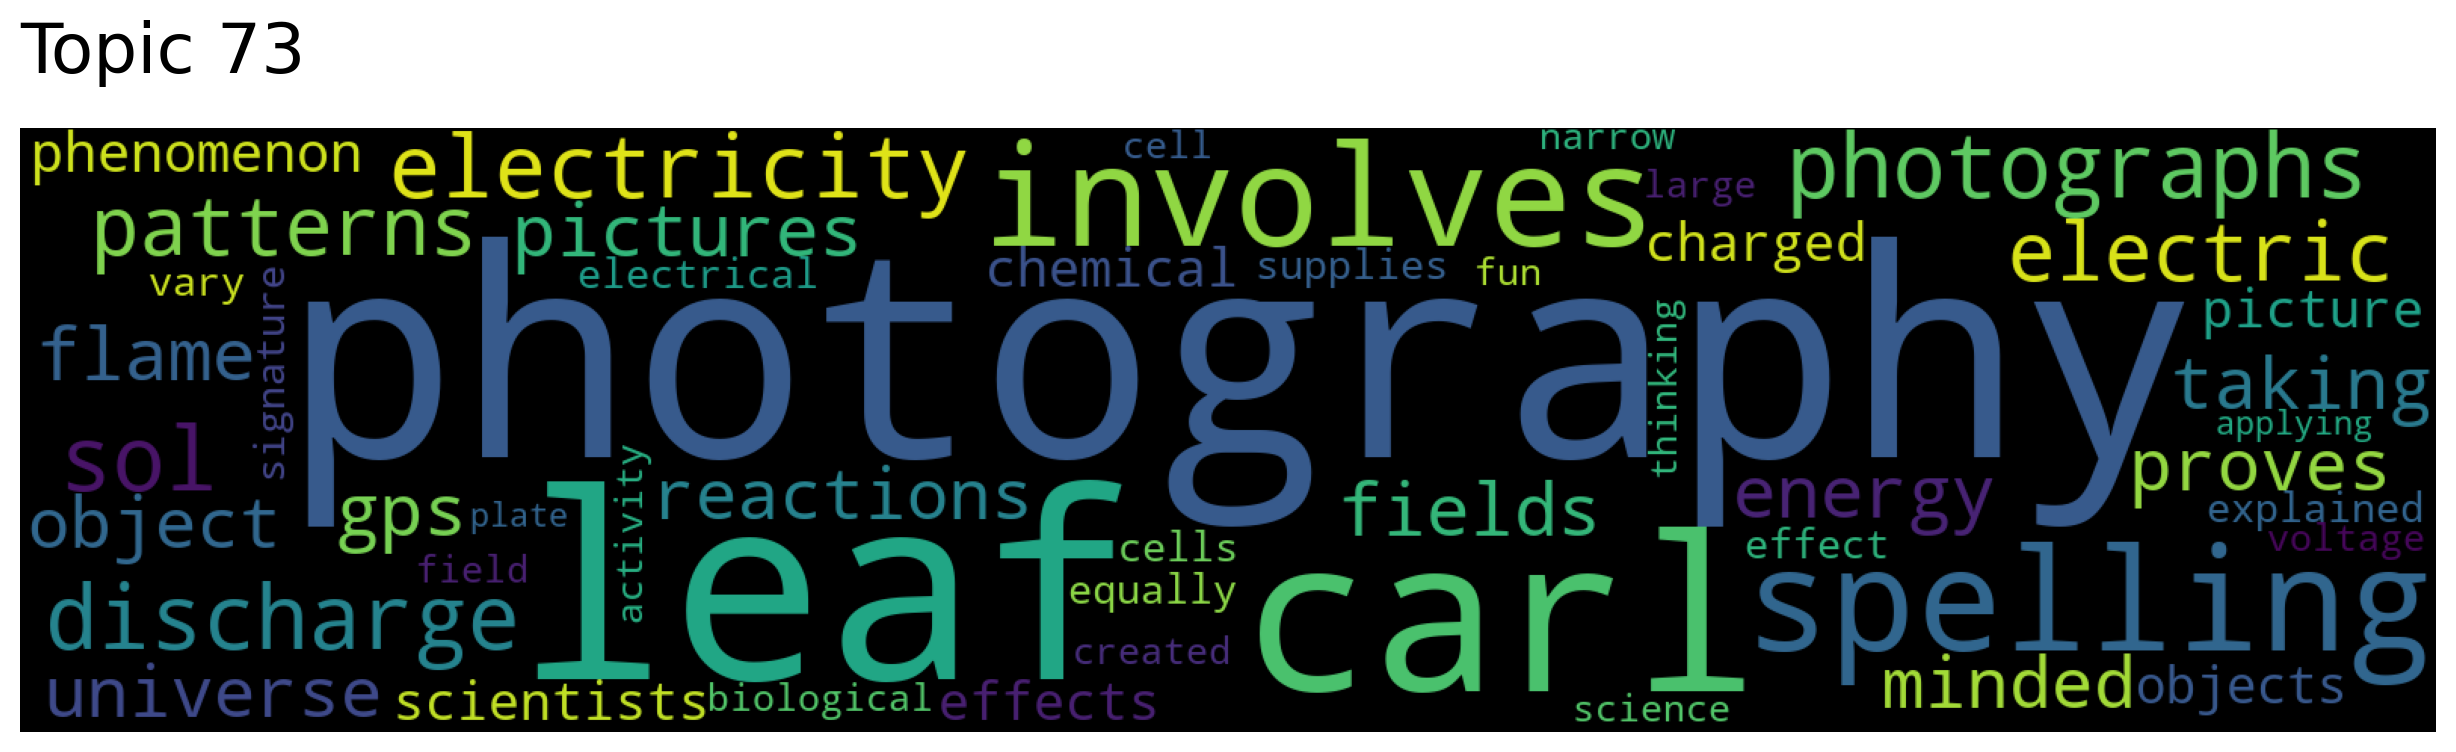

In [8]:
# Generate Word Cload
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [9]:
# Search Documents by Topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)

In [10]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 7224, Score: 0.6767942309379578
-----------
) From: coates@bigwpi.WPI.EDU (Jeffery David Coates)
) Subject: TEST
) Date: 23 Apr 1993 21:09:29 GMT
) Organization: Worcester Polytechnic Institute
) 
) 
) 
) Test
) 
Failed

-----------

Document: 18555, Score: 0.6722702383995056
-----------
Article: 41686 of sci.electronics
Newsgroups: sci.electronics
Path: news.nd.edu!spool.mu.edu!howland.reston.ans.net!bogus.sura.net!news-feed-1.peachnet.edu!gatech!asuvax!ennews!mcdphx!schuch
From: schuch@phx.mcd.mot.com (John Schuch)
Subject: Food Dehydrators
Message-ID: <1993Apr19.154356.17880@phx.mcd.mot.com>
Sender: news@phx.mcd.mot.com
Nntp-Posting-Host: bopper2.phx.mcd.mot.com
Organization: Motorola Computer Group, Tempe, Az.
Distribution: usa
Date: Mon, 19 Apr 93 10:43:56 EST
Lines: 9


Try Mother Earth News, Feb/March 1993, pg 54, "Build a Food Dryer"
-----------

Document: 10096, Score: 0.6471677422523499
-----------
From mikefran Wed Apr 21 11:08:28 EDT 1993
Article: 56 of csc.genera

In [11]:
# Semantic Search Documents by Keywords

documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cryptography", "privacy"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 16837, Score: 0.6440016627311707
-----------
Archive-name: net-privacy/part2
Last-modified: 1993/3/3
Version: 2.1


IDENTITY, PRIVACY, and ANONYMITY on the INTERNET

(c) 1993 L. Detweiler.  Not for commercial use except by permission
from author, otherwise may be freely copied.  Not to be altered. 
Please credit if quoted.

SUMMARY

Email and account privacy, anonymity, file encryption,  academic 
computer policies, relevant legislation and references, EFF, and 
other privacy and rights issues associated with use of the Internet
and global networks in general.

(Search for <#.#> for exact section. Search for '_' (underline) for
next section.)

PART 2
====== (this file)

Resources
---------

<4.1> What UNIX programs are related to privacy?
<4.2> How can I learn about or use cryptography?
<4.3> What is the cypherpunks mailing list?
<4.4> What are some privacy-related newsgroups?  FAQs?
<4.5> What is internet Privacy Enhanced Mail (PEM)?
<4.6> What are other Request For Comments

In [12]:
# Similar Keywords
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

nasa 0.6756091237029213
planetary 0.6155091879984734
shuttle 0.6095999606368177
exploration 0.59100458118172
missions 0.539660762225122
telescope 0.5081917143146928
satellite 0.5035454029689824
launch 0.5034188744829555
orbital 0.5033264924423592
solar 0.49056928768523916
astronomy 0.48898876678983905
astro 0.47150368171957024
orbit 0.4681647057572353
lunar 0.4613446225741882
spacecraft 0.45788061614440784
mission 0.45523820285529865
jsc 0.4475377350718803
flight 0.44348507968244
propulsion 0.4404678759246305
observatory 0.43541187173666734


## Save and Load Model

In [13]:
# # model can be saved and loaded
# model.save("filename")
# model = Top2Vec.load("filename")

## Pretrained Embeddings
- Doc2Vec will be used by default to generate the joint word and document embeddings. However there are also pretrained `embedding_model` options for generating joint word and document embeddings:

In [ ]:
# from top2vec import Top2Vec
# model = Top2Vec(documents, embedding_model='universal-sentence-encoder')